# Oppgave 3: Klyngeanalyse (10 poeng)


### Oppgaven inneholder følgende elementer:
* Last inn et datasett og undersøk innholdet.  
* Bruk $K$-gjennomsnitt-klyngeanalyse får å finne klynger i bilder av håndskrevne tall (0-9). 
* Diskuter resultatene av klyngeanalysen.
* Diskutere $K$-gjennomsnitt-klyngeanalyse vs. hierarkisk klynganalyse.
* Kommenter resultatene fra en hierarkisk klyngeanalyse.

## Finn klynger (struktur) i bildene av håndskrevne tall

Et stort felt innen maskinlæring er bildegjenkjenning (image recognition) og klassifisering. Dette innebærer at vi laster inn et bilde i en statistisk algoritme og får tilbake en etikett som beskriver hva bildet forestiller – for eksempel en person, et tall eller en sykdom.

I dette eksempelet skal vi jobbe med data fra *mnist* (Modified National Institure of Standards and Technology) databasen, som for eksempel finnes her: https://www.kaggle.com/c/digit-recognizer. Datasettet inneholder digitaliserte bilder av håndskrevne sifre (0–9), og brukes ofte til å trene maskinlæringsalgoritmer for klassifikasjon. Det betyr at man ønsker å forutsi hvilket tall et gitt bilde viser, slik at datamaskinen kan lese tall – for eksempel postnummeret på et brev.

Her bruker vi datasettet til noe annet: Vi vil undersøke om vi finner struktur i bildene ved bruk av en klyngeanalyse. Vi vil jo kanskje håpe at de samme sifrene kommer til å bli gruppert i en klynge fordi de inneholder lignende mønstre. Her skal vi se om det er sant. 

Vi har lært om to populære algoritmer som brukes til å lage klynger av objekter: 

   * $K$-gjennomsnitt ($K$-means) algoritmen: Målet med denne algoritmen er å plassere de individuelle observasjonene i $K$ grupper (kalt klynger) basert på observasjonenes avstand til grupper av andre observasjoner. Algoritmen kjøres iterativt, og stoppes når alle observasjoner som ligner hverandre er plassert i en gruppe (klynge) sammen.
   * Hierarkisk klyngeanalyse (se nedenfor).
  


In [1]:
# importere pakker og funksjoner vi trenger i oppgave 3
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans  # k-gjennomsnitt klyngeanalyse

from scipy.cluster.hierarchy import dendrogram, linkage

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

## Les inn datasettet

Vi begynner med å lese inn datasettet som inneholder digitaliserte, håndskrevne sifre. Hvert siffer er plassert i en firkant på 
$28\cdot 28$ = 784 piksler, og hvert bilde kan dermed representeres som en vektor ned lengde 784.


In [2]:
## Les inn datasettet og se på de første 5 eksempler

images = pd.read_csv('https://www.math.ntnu.no/emner/IST100x/ISTx1003/h2021/images.csv', sep = ",", index_col = 0)

images.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Å skrive ut headeren gir ikke noe spesielt interessant. Pikslene i disse bildene er gitt som tall mellom 0 og 255 (gråskala), der 0 representerer helt svart og 255 helt hvitt. Pikslene som er vist ovenfor, tilsvarer det øverste venstre hjørnet av bildet og det nedre høyre hjørnet, som vi forventer er tomt (svart, altså 0).

Vi ønsker å standardisere disse tallene slik at de ligger mellom 0.0 og 1.0 før analysen utføres.


In [3]:
## Standardisering av pikselne

images = images/255

Utskrift av tilleggsinformasjon om strukturen og objektene til datasettet gir:


In [4]:
# hvilken type er bildet vårt
print("Bildet har type", type(images))

# bildet er en numpytabell. Hva er formatet?
print("Formatet til tabellen er", images.shape)

#Average colour in image 50
print("Gjennomsnittsfarge i bilde er", images.iloc[49].mean())

print('Dataformatet til en piksel er', type(images.iloc[1,1]))


Bildet har type <class 'pandas.core.frame.DataFrame'>
Formatet til tabellen er (6000, 784)
Gjennomsnittsfarge i bilde er 0.16487595038015207
Dataformatet til en piksel er <class 'numpy.float64'>


Og så skal vi se hvordan de første 10 bildene i datasettet ser ut: 

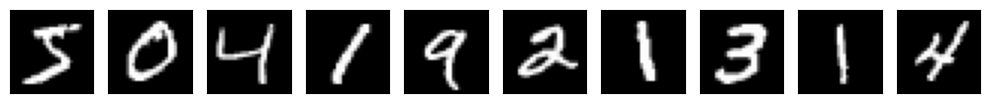

In [ ]:
features = np.array(images)
features = features.reshape(features.shape[0], 28,28)

fig = plt.figure(figsize=(10,10))

for i in range(10):
    fig.add_subplot(1, 10, i+1)
    
    plt.imshow(features[i], cmap = 'gray')
    
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    

Det er ganske enkelt for oss mennesker å gjenkjenne disse individuelle sifrene – selv om håndskriften kan være vanskelig å tyde. Nå vil vi se hvor godt K-gjennomsnittsalgoritmen klarer å finne struktur i disse dataene.

### Problem 3a) (2P)

  (i) Hvor mange bilder har vi i datasettet?  

  (ii) Hvilket siffer ligner det 50. bildet i datasettet vårt på? Lag et plott som viser dette sifferet. (Husk at Python begynner nummereringen med 0, og derfor refereres det 50. bildet til [49])

 
###   <font color='red'>Løsning:</font> Svar på svararket.

In [ ]:
print("Oppgave 3a)i): Hvor mange bilder er det i datasettet")
print("Hvert bilde har 28*28 = 784 piksler, som tilsvarer en rad i datasettet") 
print("Vi må altså finne antall rader i datasettet")
antall_bilder = len(images)

print ("Antall bilder er: " , antall_bilder)

Oppgave 3a)i): Hvor mange bilder er det i datasettet
Hvert bilde har 28*28 = 784 piksler, som tilsvarer en rad i datasettet
Vi må altså finne antall rader i datasettet
Antall bilder er derfor:  6000


Oppgave 3a)ii): Bilde nummer 50 i datasett (vi kan bare gjenbruke koden som viser de første 10)


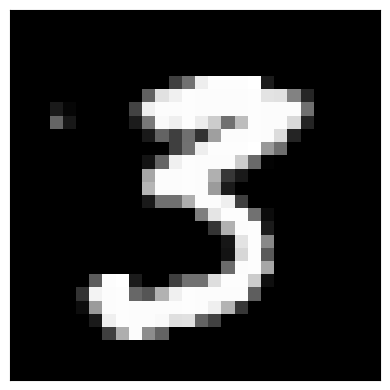

In [ ]:
print ("Oppgave 3a)ii): Bilde nummer 50 i datasett (vi kan bare gjenbruke koden som viser de første 10)")

features = np.array(images)
features = features.reshape(features.shape[0], 28,28)

fig = plt.figure(figsize=(4,4))

# for i in range(10): (Bare fjerner denne)
# fig.add_subplot(1, 10, i+1) 
    
plt.imshow(features[49], cmap = 'gray') #Endrer fra i til 49 
    
plt.xticks([])
plt.yticks([])
plt.tight_layout()

## Klyngeanalyse med $K$-gjennomsnitt

La oss nå endelig utføre $K$-gjennomsnittalgoritme. Vi må gå gjennom følgende steg:

  1. Angi antall klynger du ønsker
  2. Initialiser $K$-gjennomsnitt-modellen
  3. Tilpass $K$-gjennomsnitt-modellen

Vi bruker 𝐾-gjennomsnittsfunksjonen med $K=10$ (se kode under), fordi vi håper jo å finne igjen de 10 sifferene (0-9) som klyngene.

I tillegg kan vi få tilgang til sentroidene i klyngene våre i tabellen `means.cluster_centers_`, og plotte dem for å se hvordan algoritmen mener det typiske bildet i hver av de 10 gruppene ser ut.


Hint: Her kan du lese litt mer om KMeans-funksjonen: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [35]:
# kodechunk kmeans

# Steg 1: Antall klynger
antall_klynger = 10

# Steg 2: Initaliser k-means algoritmen
kmeans = KMeans(n_clusters = antall_klynger, random_state = 1,n_init=10)

# Steg 3: Tilpass modellen
kmeans.fit(images)

# sentroidene (a)
sentroider = kmeans.cluster_centers_

### Problem 3b) (3P)


 (i) Tegn sentroidene av de 10 klyngene fra $K$-gjennomsnitt modellen. Tilpass koden oppover (ovenfor problem 3a).
 
 (ii) Synes du at grupperingen i klynger er relevant og nyttig? Forklar. Maks 3 setninger. 

 (iii) Vi har valgt $K=10$ for dette eksempelet fordi vi hadde håpet å finne klynger som representerer de 10 sifferene 0-9. Men generelt er $K$ vilkårlig. Kom opp med en forslåg for hvordan man (generelt, ikke nødvendigvis her) kan best velge $K$. (Se her, for eksempel: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Beskriv i egne ord med maks 3 setninger! 
 
###   <font color='red'>Løsning:</font> Svar på svararket.  (Gjerne også kopier et bilde av koden og resultatet fra jupyter notebooken.)

## Hierarkisk klyngeanalyse

Vi fortsetter nå med å bruke hierarkisk klyngeanalyse for *mnist* datasettet. Vi gjør *Agglomerative Clustering* ved bruk av `sklearn.cluster` pakken. (Agglomerative Clustering er noe vi har lært om i undervisningen, men se også her hvis du har lyst til å vite mer: https://en.wikipedia.org/wiki/Hierarchical_clustering)

 
Siden hierarkisk gruppering er tregt for store datasett, spesielt for grafiske data, ble et tilfeldig utvalg på 20 bilder valgt fra det originale datasettet for å illustrere bruken av denne modellen.


### Problem 3c (3P):
 
(i) Vurder dendrogrammet nedenfor. Synes du at den hierarkiske grupperingsalgoritmen har laget gode og meningsfulle grupper av bildene?

(ii) I koden under har vi brukt gjennomsnittskobling  (`method = 'average'`). Hvordan fungerer gjennomsnittskobling? Maks 2 setninger!

(iii) Velg en annen måte å koble klyngene sammen på (vi har lært om dette i undervisningen) og lag et nytt dendrogram ved å tilpasse koden nedenfor. Kommenter resultatene: Ser det bedre eller verre ut?


###   <font color='red'>Løsning:</font> Svar på svararket.  (Gjerne også kopier et bilde av koden og resultatet fra jupyter notebooken.)

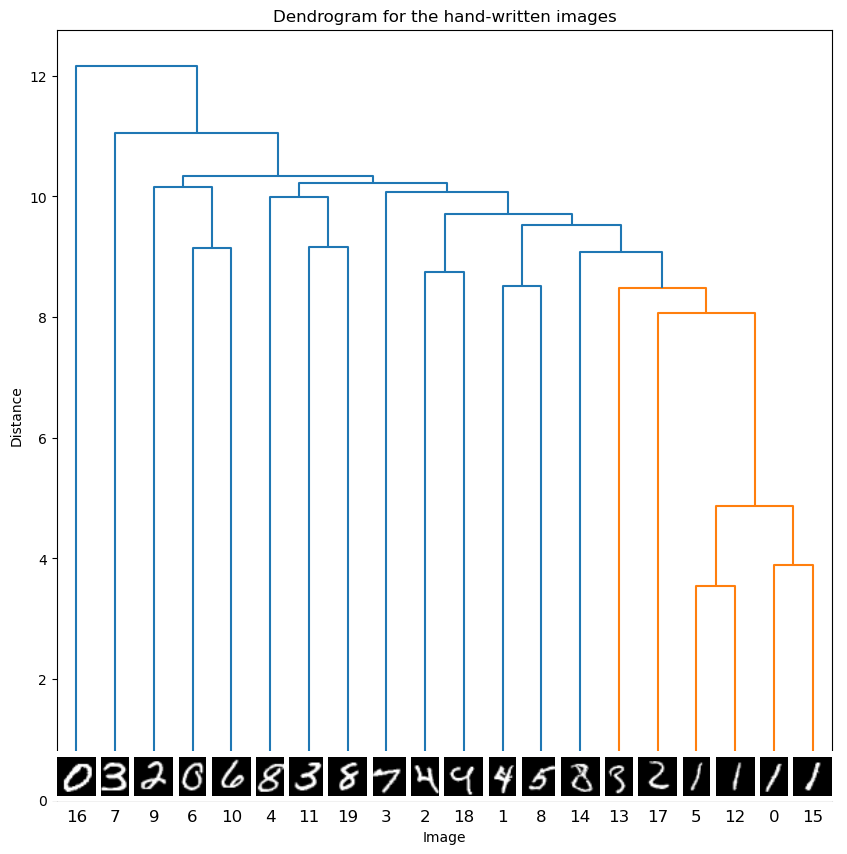

In [36]:
##Cluster

n_image = 20

sample = images.sample(n = n_image, random_state = 1)

sampleimg = np.array(sample).reshape(sample.shape[0], 28,28)

plt.figure(figsize=(10,10))
ax = plt.subplot()

# Bruk gjennomsnittskobling (method='average')
link = linkage(y = sample, method = 'average', metric = 'euclidean')

dendro = dendrogram(link)

dcoord = np.array(dendro["dcoord"])
icoord = np.array(dendro["icoord"])
leaves = np.array(dendro["leaves"])

idx = np.argsort(dcoord[:, 2])

dcoord = dcoord[idx, :]
icoord = icoord[idx, :]

idx = np.argsort(link[:, :2].ravel())
label_pos = icoord[:, 1:3].ravel()[idx][:n_image]

for i in range(n_image):
    imagebox = OffsetImage(sampleimg[i], cmap = 'gray', interpolation = "bilinear")
    ab = AnnotationBbox(imagebox, (label_pos[i], 0),  box_alignment=(0.5, -0.1), 
                        bboxprops={"edgecolor" : "none"})
    ax.add_artist(ab)

plt.title('Dendrogram for the hand-written images')
plt.xlabel('Image')
plt.ylabel('Distance')
plt.show()


### Problem 3d) (2P)

 
(i) Med tanke på at verken de 10 klyngene funnet med $K$-gjennomsnittsalgoritmen, eller med hierarkisk klyngeanalyse, ser ut til å representere de 10 sifferene 0-9 veldig godt, tror du at klyngeanalyse (som er en ikke-veiledet metode) var en god metode for å bruke her? 

(ii) Hvilke andre metode vil du anbefale når målet er å klassifisere (predikere) siffer fra et håndskrevet tall?

###   <font color='red'>Løsning:</font>  Svar på svararket.